In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### part 1. determine splits

In [2]:
# BUILT DATASET
# color: WHITE = 0; BROWN = 1
# spots: N=0, Y=1
mr = {
    'Y':['N','N','N','N','N','N','N','Y','Y','Y','Y','Y'],
    'size':[1,5,2,2,3,4,1,5,4,4,1,1],
    'spots':[0,0,1,1,1,0,0,1,1,1,1,1],
    'color':[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
}

In [3]:
mr_df=pd.DataFrame(mr)
mr_df

,Y,size,spots,color
0,N,1,0,0
1,N,5,0,0
2,N,2,1,0
3,N,2,1,1
4,N,3,1,1
5,N,4,0,0
6,N,1,0,1
7,Y,5,1,0
8,Y,4,1,1
9,Y,4,1,1


In [4]:
feature_names = mr_df.columns[1:]
class_names = mr_df['Y'].unique()
# mr_df['Y'],class_names = pd.factorize(mr_df['Y'])
class_names

array(['N', 'Y'], dtype=object)

In [5]:
X, y=mr_df.iloc[:, 1:], mr_df['Y']

In [6]:
X.shape, y.shape

((12, 3), (12,))

In [7]:
# build tree model
tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

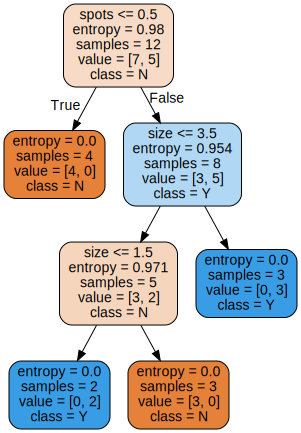

In [8]:
# Visualizing the Entropy based Decision Tree
graph_data = tree.export_graphviz(tree_entropy, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

### Part 2: Decision Tree using Python

In [9]:
wbc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [10]:
wbc.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X, y = wbc.iloc[:, 2:], wbc.iloc[:, 1]
X.shape, y.shape

((569, 30), (569,))

In [12]:
# 1) Divide the data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1,
                                                    stratify=y,
                                                    test_size=0.2)

In [13]:
# 2) train the Decision Tree Classifier using all the features of the data and test your model on the test data
crts = ["gini", "entropy"]
for crt in crts:
    tree_rotat = DecisionTreeClassifier(criterion=crt, random_state=1)
    tree_rotat.fit(X_train, y_train)
    y_pred = tree_rotat.predict(X_test)
    print(f'Accuracy for Decision Tree with criteria as {crt} Index is: {accuracy_score(y_test,y_pred)*100}')

Accuracy for Decision Tree with criteria as gini Index is: 92.98245614035088
Accuracy for Decision Tree with criteria as entropy Index is: 92.98245614035088


In [14]:
# 3) Use the Grid Search method to run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the
# Gini Impurity and Entropy impurity measures
para = {'criterion':["gini", "entropy"], 'max_depth':[1, 2, 3, 4, 5, 6]}
clf=GridSearchCV(DecisionTreeClassifier(), param_grid=para, cv=5)
clf.fit(X_train, y_train)

result_df = pd.DataFrame(clf.cv_results_)
result_df.iloc[4:, :]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.009366,0.007648,0.000000,0.000000,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.912088,0.956044,0.901099,0.945055,0.978022,0.938462,0.028317,5
5,0.003125,0.006250,0.003131,0.006261,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.934066,0.923077,0.912088,0.967033,0.989011,0.945055,0.028656,3
6,0.000000,0.000000,0.003124,0.006248,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.868132,0.890110,0.879121,0.868132,0.879121,0.876923,0.008223,12
7,0.006248,0.007653,0.003124,0.006249,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.868132,0.956044,0.879121,0.868132,0.923077,0.898901,0.035027,10
8,0.006249,0.007653,0.000000,0.000000,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.956044,0.934066,0.912088,0.956044,0.978022,0.947253,0.022413,2
9,0.006249,0.007653,0.000000,0.000000,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.945055,0.956044,0.945055,0.923077,0.978022,0.949451,0.017855,1
10,0.006254,0.007660,0.003118,0.006236,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.879121,0.945055,0.934066,0.934066,0.989011,0.936264,0.035027,6
11,0.006249,0.007653,0.000000,0.000000,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.879121,0.923077,0.945055,0.934066,0.989011,0.934066,0.035438,7


In [17]:
# 4) Determine the best model use the plot.tree() method to visualize it.
# Answer: best model is 'entropy' with max_depth=4

# train the model
tree_entropy_bc = DecisionTreeClassifier(criterion = "entropy", random_state = 1,
                                      max_depth=4)
tree_entropy_bc.fit(X_train, y_train)
y_pred_entropy_bc = tree_entropy_bc.predict(X_test)
y_pred_entropy_bc

print(f'The accuracy is: {accuracy_score(y_test, y_pred_entropy_bc)*100}')

The accuracy is: 94.73684210526315


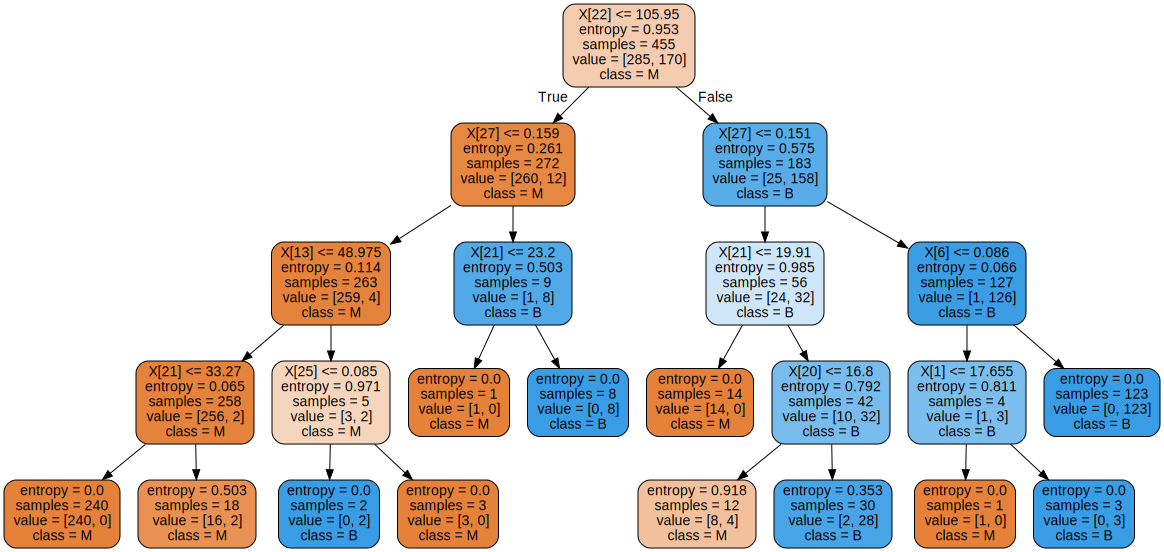

In [16]:
# plot the tree
# feature_names = X.columns
class_names_entropy_bc = y.unique()

# Visualizing the Entropy based Decision Tree
graph_data_entropy_bc = tree.export_graphviz(tree_entropy_bc, out_file=None, filled=True, rounded=True,                                  
                                class_names=class_names_entropy_bc)
graph_bc = graphviz.Source(graph_data_entropy_bc)
graph_bc

In [18]:
# 5) Use Adaboost to improve the model and evaluate the performance using the test set
tree_entropy_2 = AdaBoostClassifier(
                                    DecisionTreeClassifier(criterion = "entropy",max_depth=4),
                                    n_estimators=300,random_state=1)
tree_entropy_2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=4),
                   n_estimators=300, random_state=1)

In [19]:
# 6) What is the accuracy?
# predict & accuracy
y_pred_entropy_2 = tree_entropy_2.predict(X_test)
y_pred_entropy_2
print(f'The accuracy is: {accuracy_score(y_test, y_pred_entropy_2)*100}')

The accuracy is: 97.36842105263158


### Part 3: Random Forest using Python 

1) Use the same training and test set as above.
2) Use the RandomForest classifier (https://scikit-learn.org/stable/modules/generated/ sklearn.ensemble.RandomForestClassifier.html) to create a model.
3) Compare the parameters that are provided for the Random Forest classifier and Decision Tree classifier. How many are the same and how many are different?

- same parameters: (14 parameters in total)
    -     *,
    - criterion='gini',
    - splitter='best',
    - max_depth=None,
    - min_samples_split=2,
    - min_samples_leaf=1,
    - min_weight_fraction_leaf=0.0,
    - max_features=None,
    - random_state=None,
    - max_leaf_nodes=None,
    - min_impurity_decrease=0.0,
    - min_impurity_split=None,
    - class_weight=None,
    - ccp_alpha=0.0

   -  Different parameters (7 parameters -- RandomForestClassifier is provided with the following additinal parameters)
    - n_estimators=100,
    - bootstrap=True,
    - oob_score=False,
    - n_jobs=None,    
    - verbose=0,
    - warm_start=False,    
    - max_samples=None.

4) Use the Grid Search method to run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the Gini Impurity and Entropy impurity measures. Also set the parameter so it will use the "outof-bag" samples for calculating accuracy.

In [21]:
para = {'criterion':["gini", "entropy"], 'max_depth':[1, 2, 3, 4, 5, 6]}
clf_forest=GridSearchCV(RandomForestClassifier(oob_score=True), param_grid=para, cv=5)
clf_forest.fit(X_train, y_train)

result_df_forest = pd.DataFrame(clf_forest.cv_results_)
result_df_forest.iloc[:, 4:]

,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.901099,0.956044,0.912088,0.868132,0.912088,0.909890,0.028146,12
1,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.923077,0.967033,0.945055,0.934066,0.945055,0.942857,0.014579,9
2,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.945055,0.978022,0.934066,0.945055,0.967033,0.953846,0.016150,6
3,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.945055,0.967033,0.934066,0.945055,0.967033,0.951648,0.013187,8
4,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.945055,0.967033,0.945055,0.956044,0.967033,0.956044,0.009829,3
5,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.956044,0.978022,0.945055,0.956044,0.967033,0.960440,0.011207,1
6,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.945055,0.945055,0.912088,0.868132,0.912088,0.916484,0.028317,11
7,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.934066,0.945055,0.912088,0.912088,0.923077,0.925275,0.012815,10
8,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.956044,0.967033,0.945055,0.945055,0.956044,0.953846,0.008223,6
9,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.945055,0.989011,0.934066,0.945055,0.967033,0.956044,0.019658,3


best model: entropy with max_depth=3, gini with max_depth=4

5) Test the accuracy of RandomForest using the Test set.

6) Compare the performance of Decision Tree with Boost and Random Forest.

In [22]:
forest_entropy = RandomForestClassifier(criterion='entropy',
                                oob_score=True,
                                random_state=1,
                                max_depth=3)
forest_entropy.fit(X_train,y_train)
y_pred_f_entropy = forest_entropy.predict(X_test)
y_pred_f_entropy
print(f'The accuracy is: {accuracy_score(y_test, y_pred_f_entropy)*100}')

The accuracy is: 94.73684210526315


In [23]:
forest_gini = RandomForestClassifier(criterion='gini',
                                oob_score=True,
                                random_state=1,
                                max_depth=4)
forest_gini.fit(X_train,y_train)
y_pred_f_gini = forest_gini.predict(X_test)
y_pred_f_gini
print(f'The accuracy is: {accuracy_score(y_test, y_pred_f_gini)*100}')

The accuracy is: 94.73684210526315


The performance 
- RandomTreeDecision with boost             ** 97.36842105263158 **
- RandomForestClassifier (gini & entropy)   ** 94.73684210526315 **

RandomTreeDecision with boost performed better.